In [1]:
from pandas import Series
from datetime import datetime
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
train[['ID','Date']] = train.row_id.str.split("_",expand=True)
train['Date'] = pd.to_datetime(train.Date,format='%Y-%m-%d') 

In [6]:
test = pd.read_csv('test.csv')
test[['ID','Date']] = test.row_id.str.split("_",expand=True)
test['Date'] = pd.to_datetime(test.Date,format='%Y-%m-%d') 

In [8]:
for i in (train, test):
    i['year']=i.Date.dt.year 
    i['month']=i.Date.dt.month 
    i['day']=i.Date.dt.day

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
y = train['microbusiness_density']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

In [12]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

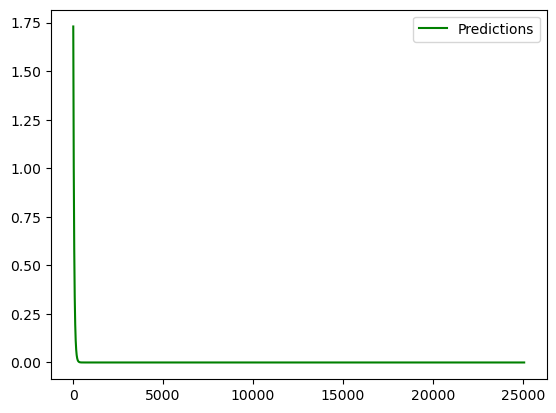

In [13]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()